# 2 Data Description

In [12]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

# Paths
DATA_PATH   = Path("forest_cover.csv")                
CLEAN_PATH = Path("outputs/forest_cover.csv")  
CLEAN_PATH.parent.mkdir(parents=True, exist_ok=True)       

In [13]:
# 2.1 Load & shape
df = pd.read_csv(DATA_PATH)

# 2.2 Quick peek at the dataset
n_rows, n_cols = df.shape
print(f"Instances (rows): {n_rows}")
print(f"Attributes (columns): {n_cols}")
df.head(3)

# Stats about the dataset
df.describe() 

Instances (rows): 30860
Attributes (columns): 56


,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Neota,Rawah,Comanche Peak,Cache la Poudre
count,30860.00000,25923.000000,23763.000000,28083.000000,28392.000000,29009.000000,28392.000000,21602.000000,27157.000000,22220.000000,...,16356.000000,12962.000000,13270.000000,16665.000000,23145.000000,17591.000000,30860.000000,30860.000000,30860.000000,30860.000000
mean,15429.50000,2954.202639,153.369019,14.141402,264.551176,46.756145,2363.317519,212.625127,223.363700,143.421782,...,0.002874,0.000077,0.000528,0.025503,0.023850,0.016258,0.051361,0.446371,0.440181,0.062087
std,8908.65899,866.082144,490.489831,22.473536,679.431566,156.142288,5379.999154,81.804297,59.364348,124.874519,...,0.053530,0.008783,0.022962,0.157650,0.152584,0.126471,0.220737,0.497124,0.496417,0.241317
min,0.00000,-730.000000,-1961.000000,-81.000000,-2652.000000,-613.000000,-20985.000000,-132.000000,-27.000000,-381.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7714.75000,2796.000000,56.000000,8.000000,95.000000,6.000000,1057.000000,197.000000,212.000000,117.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15429.50000,2996.000000,126.000000,13.000000,218.000000,30.000000,1992.000000,218.000000,226.000000,143.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23144.25000,3173.000000,268.500000,19.000000,391.000000,72.000000,3393.250000,232.000000,238.000000,171.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,30859.00000,6704.000000,2281.000000,108.000000,3144.000000,689.000000,25383.000000,561.000000,477.000000,669.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# 2.3 Check data types, data frame and missing number and ratio
df_info = pd.DataFrame({
    'Column': df.columns,
    'DataType': [df[col].dtype for col in df.columns],
    'Non-Null Count': [df[col].notna().sum() for col in df.columns],
    'Missing Count': [df[col].isna().sum() for col in df.columns],
    'Missing Ratio': [(df[col].isna().mean() * 100).round(2) for col in df.columns],
    'Unique Values': [df[col].nunique(dropna=False) for col in df.columns]
})

df_info


,Column,DataType,Non-Null Count,Missing Count,Missing Ratio,Unique Values
0,Unnamed: 0,int64,30860,0,0.0,30860
1,Elevation,float64,25923,4937,16.0,1569
2,Aspect,float64,23763,7097,23.0,364
3,Slope,float64,28083,2777,9.0,59
4,Horizontal_Distance_To_Hydrology,float64,28392,2468,8.0,426
5,Vertical_Distance_To_Hydrology,float64,29009,1851,6.0,506
6,Horizontal_Distance_To_Roadways,float64,28392,2468,8.0,4549
7,Hillshade_9am,float64,21602,9258,30.0,180
8,Hillshade_Noon,float64,27157,3703,12.0,142
9,Hillshade_3pm,float64,22220,8640,28.0,246


In [28]:
#2.4 Check the categories in Forest_Cover
print(df["Forest_Cover"].unique())         
print(df["Forest_Cover"].value_counts())

['Spruce/Fir' 'Lodgepole Pine' 'Ponderosa Pine' 'Aspen' 'Douglas-fir'
 'Krummholz' 'Cottonwood/Willow']
Forest_Cover
Lodgepole Pine       14945
Spruce/Fir           11391
Ponderosa Pine        1895
Krummholz             1060
Douglas-fir            939
Aspen                  489
Cottonwood/Willow      141
Name: count, dtype: int64


# 3 Data Cleaning and Processing

## 3.1 Apply appropriate cleaning strategies

### 3.1.1 Handle redundant columns

In [37]:
# Search for redundant columns¶
redundant_cols = [col for col in df.columns if "Unnamed" in col]
print("Redundant candidates:", redundant_cols)

# Delete redundant columns
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Check the number of columns after deletion
print("The number of deleted columns:", df.shape[1])

Redundant candidates: ['Unnamed: 0']
The number of deleted columns: 16


### 3.1.2 Convert one-hot encoded Soil_Type1~40 columns into a single Soil_Type column

In [39]:
# Select only columns Soil_Type1 ~ Soil_Type40 (avoid columns without numeric suffix)
soil_cols = [col for col in df.columns if col.startswith("Soil_Type") and col[9:].isdigit()]

# Fill missing values with 0 and convert to int (ensure binary 0/1)
df[soil_cols] = df[soil_cols].fillna(0).astype(int)

def get_soil_type(row):
    # Find columns with value = 1
    ones = [col for col in soil_cols if row[col] == 1]
    if len(ones) == 1:
        # Normal case: extract the numeric part from column name, e.g., "Soil_Type23" -> 23
        return int(ones[0].replace("Soil_Type", ""))
    elif len(ones) == 0:
        # All zeros: no soil type, mark as None (NaN)
        return None
    else:
        # More than one column equals 1: print error and mark as -1
        print(f"Error: multiple Soil_Type=1 in row {row.name}, columns={ones}")
        return -1

# Apply the function to create a compact Soil_Type column
df["Soil_Type"] = df.apply(get_soil_type, axis=1)

# Check the result: counts for each Soil_Type, including None and -1
print(df["Soil_Type"].value_counts(dropna=False).sort_index())

# Extract rows with errors for further inspection
df_errors = df[df["Soil_Type"] == -1]
print("Rows with multiple Soil_Type=1:\n", df_errors)


Soil_Type
None    30860
Name: count, dtype: int64
Rows with multiple Soil_Type=1:
 Empty DataFrame
Columns: [Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Forest_Cover, Neota, Rawah, Comanche Peak, Cache la Poudre, Soil_Type]
Index: []


### 3.1.3 Convert one-hot encoded Wilderness_Area1~4 columns into a single Wilderness_Area column

In [40]:
wilderness_cols = [col for col in df.columns if col.startswith("Wilderness_Area") and col[15:].isdigit()]

# Fill missing values with 0 and convert to int (ensure binary 0/1)
df[wilderness_cols] = df[wilderness_cols].fillna(0).astype(int)

def get_wilderness_area(row):
    # Find columns with value = 1
    ones = [col for col in wilderness_cols if row[col] == 1]
    if len(ones) == 1:
        # Extract the numeric part from column name, e.g., "Wilderness_Area2" -> 2
        return int(ones[0].replace("Wilderness_Area", ""))
    elif len(ones) == 0:
        # All zeros: no wilderness area, mark as None (NaN)
        return None
    else:
        # More than one column equals 1: print error and mark as -1
        print(f"Error: multiple Wilderness_Area=1 in row {row.name}, columns={ones}")
        return -1

# Apply the function to create a compact Wilderness_Area column
df["Wilderness_Area"] = df.apply(get_wilderness_area, axis=1)

# Check the result: counts for each Wilderness_Area, including None and -1
print(df["Wilderness_Area"].value_counts(dropna=False).sort_index())

# Extract rows with errors for further inspection
df_wild_errors = df[df["Wilderness_Area"] == -1]
print("Rows with multiple Wilderness_Area=1:\n", df_wild_errors)

Wilderness_Area
None    30860
Name: count, dtype: int64
Rows with multiple Wilderness_Area=1:
 Empty DataFrame
Columns: [Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Forest_Cover, Neota, Rawah, Comanche Peak, Cache la Poudre, Soil_Type, Wilderness_Area]
Index: []


### 3.1.4 Clean the Slope column to ensure valid values (0–90 degrees)

In [44]:
# Replace negative slopes with their absolute values
df["Slope"] = df["Slope"].abs()

# Clip slopes greater than 90 to the maximum allowed value (90 degrees)
df["Slope"] = df["Slope"].clip(upper=90)


### 3.1.5 Clean the Aspect column to ensure valid values (0–360 degrees)

In [45]:
# Replace negative aspects with their absolute values
df["Aspect"] = df["Aspect"].abs()

# Normalize values greater than 360 back into the range [0, 360)
df["Aspect"] = df["Aspect"] % 360


### 3.1.6 Handle Hillshade variables (9am, Noon, 3pm)

In [47]:
for col in ["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]:
    if col in df.columns:
        # Replace negative values with absolute values
        df[col] = pd.to_numeric(df[col], errors="coerce").abs()
        # Relative illumination values derived from GIS calculations [0, 255]
        df[col] = df[col].clip(lower=0, upper=255)

### 3.1.7 Clean distance-related variables

In [49]:
# Horizontal_Distance should always be non-negative
horiz_cols = [c for c in df.columns if "Horizontal_Distance" in c]
for c in horiz_cols:
    df[c] = df[c].abs()

## 3.2 Fill in the missing values

In [50]:
# Fill missing values in continuous (numeric) variables using the median
# Identify continuous numeric columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Fill missing values with the median of each column
for c in num_cols:
    median_val = df[c].median()
    df[c] = df[c].fillna(median_val)


In [51]:
# Fill missing values in categorical variables with the placeholder "unknown"
# 选择类别型变量（object 或 category 类型）
# Select categorical variables (object or category types)
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Replace missing values with "unknown"
df[cat_cols] = df[cat_cols].fillna("unknown")


In [52]:
# Final check: Missing values after imputation

# Calculate total missing values per column
missing_summary = df.isnull().sum()

# Keep only columns that still have missing values
missing_summary = missing_summary[missing_summary > 0]

if missing_summary.empty:
    print(" No missing values remain in the dataset.")
else:
    print(" Remaining missing values by column:")
    print(missing_summary)

 No missing values remain in the dataset.


# 4.Exploratory Data Analysis

## 4.1 Correlation Heatmap of Numerical Features

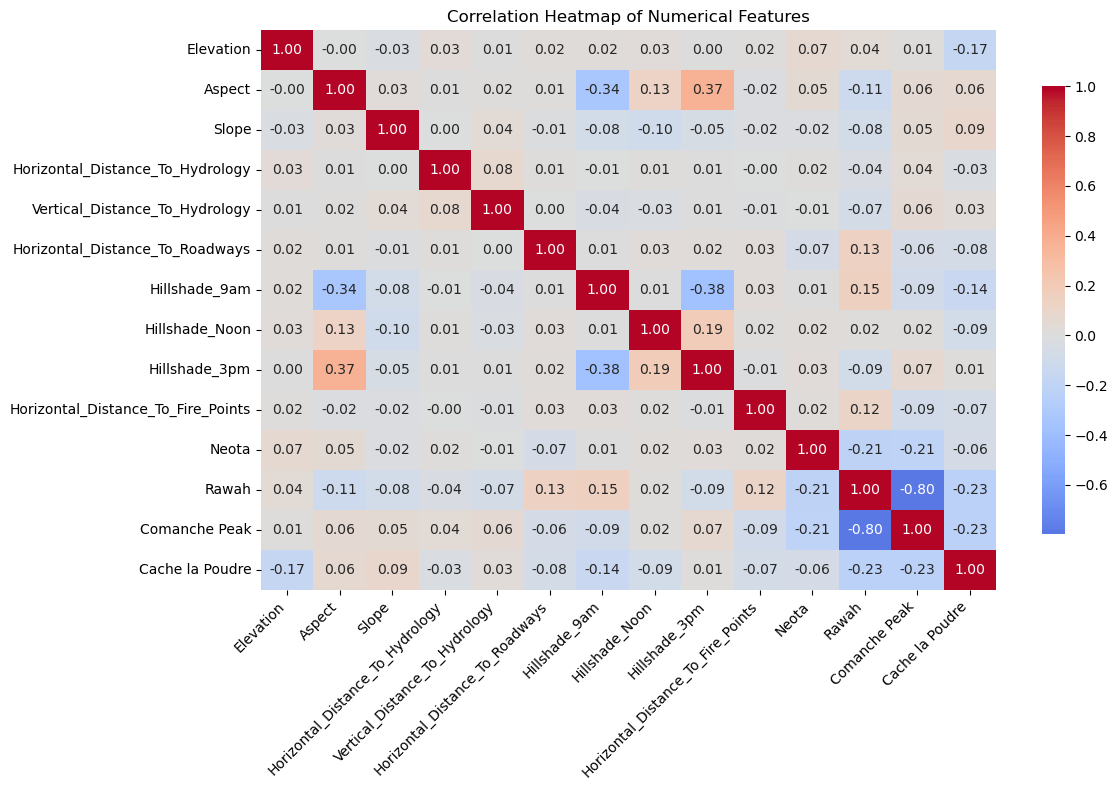

In [76]:
# Select only numeric columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 8))
ax = sns.heatmap(        
    corr_matrix, 
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm", 
    center=0,
    cbar_kws={"shrink": .8}
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

## 4.2 Scatterplot of Elevation vs Slope by Forest Cover

Correlation between Elevation and Slope: -0.031


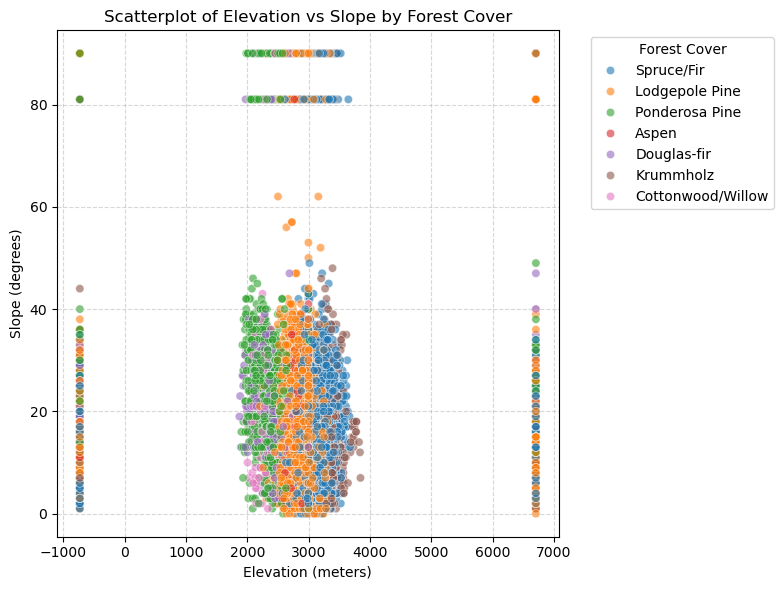

In [68]:
# Correlation
corr_val = df[["Elevation", "Slope"]].corr().iloc[0, 1]
print(f"Correlation between Elevation and Slope: {corr_val:.3f}")

# Scatterplot colored by Forest_Cover
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Elevation", y="Slope", hue="Forest_Cover", alpha=0.6)
plt.title("Scatterplot of Elevation vs Slope by Forest Cover")
plt.xlabel("Elevation (meters)")
plt.ylabel("Slope (degrees)")
plt.legend(title="Forest Cover", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## 4.3 Numerical vs Forest_Cover Boxplots

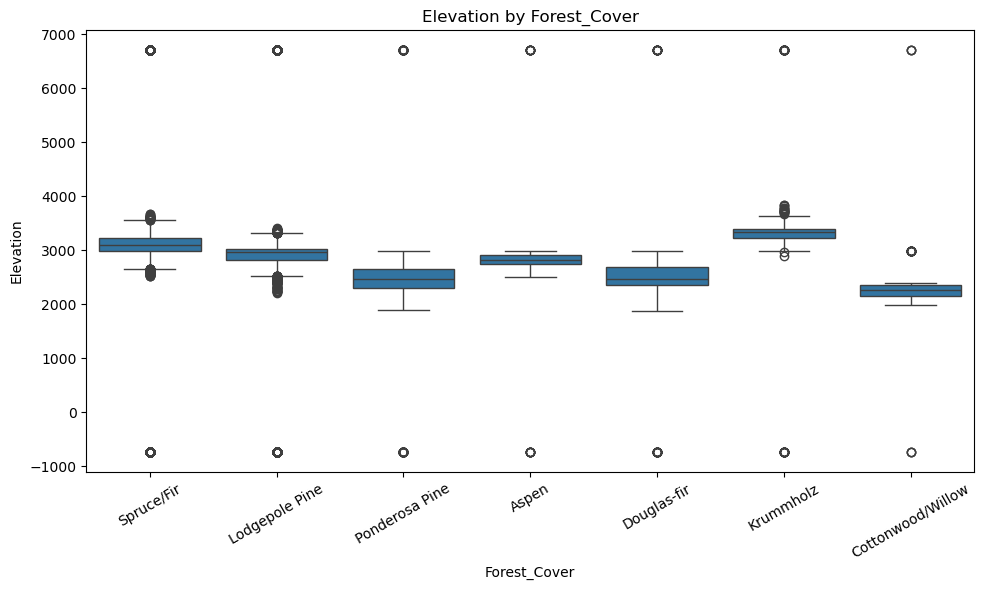

In [69]:
# Elevation by Forest_Cover (already shown)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Forest_Cover", y="Elevation")
plt.title("Elevation by Forest_Cover")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

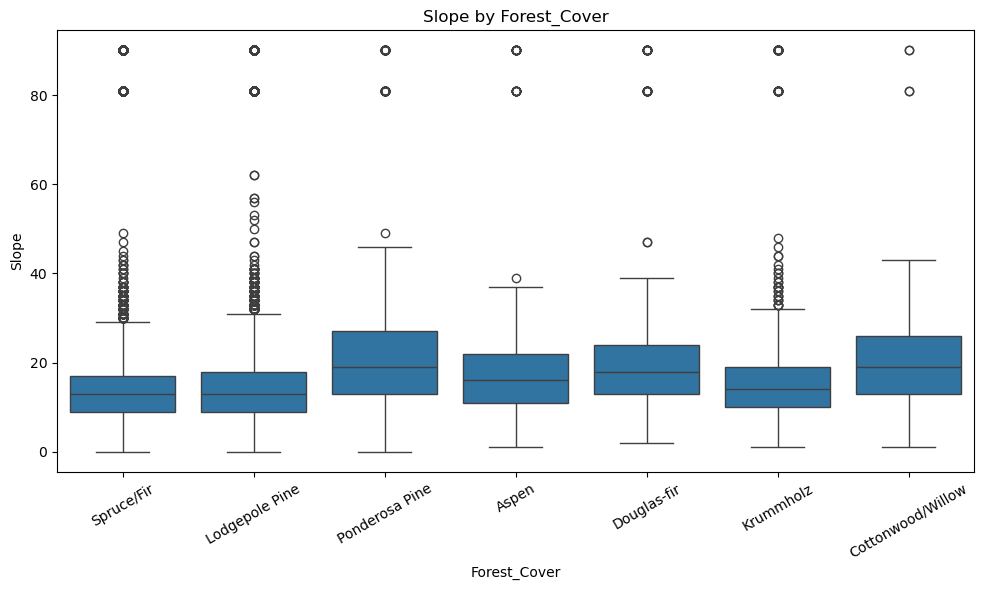

In [70]:
# Elevation by Forest_Cover (already shown)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Forest_Cover", y="Elevation")
plt.title("Elevation by Forest_Cover")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

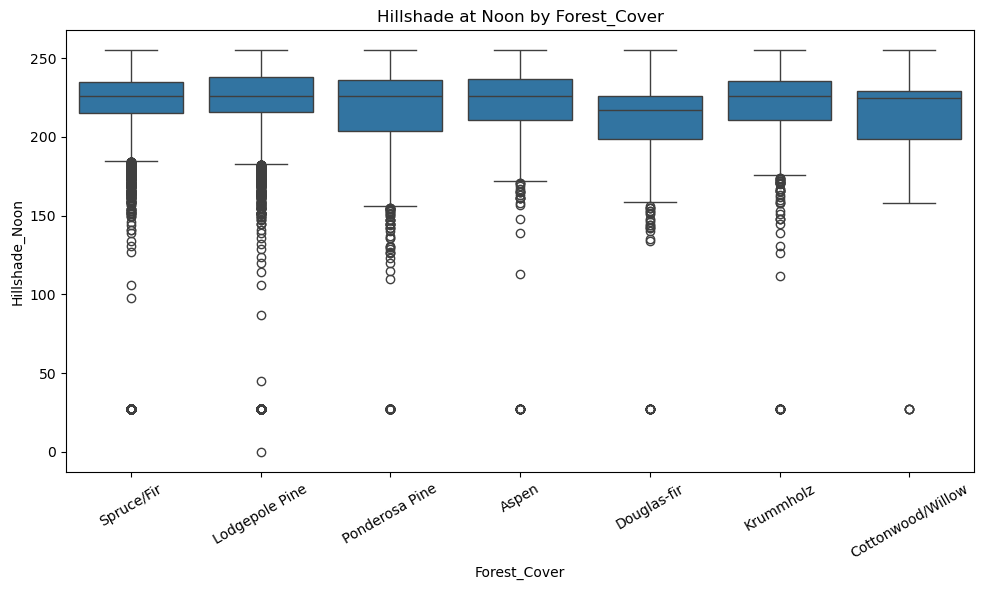

In [71]:
# Hillshade_Noon by Forest_Cover
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Forest_Cover", y="Hillshade_Noon")
plt.title("Hillshade at Noon by Forest_Cover")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## 4.4 Distribution of Forest Cover across Soil Types

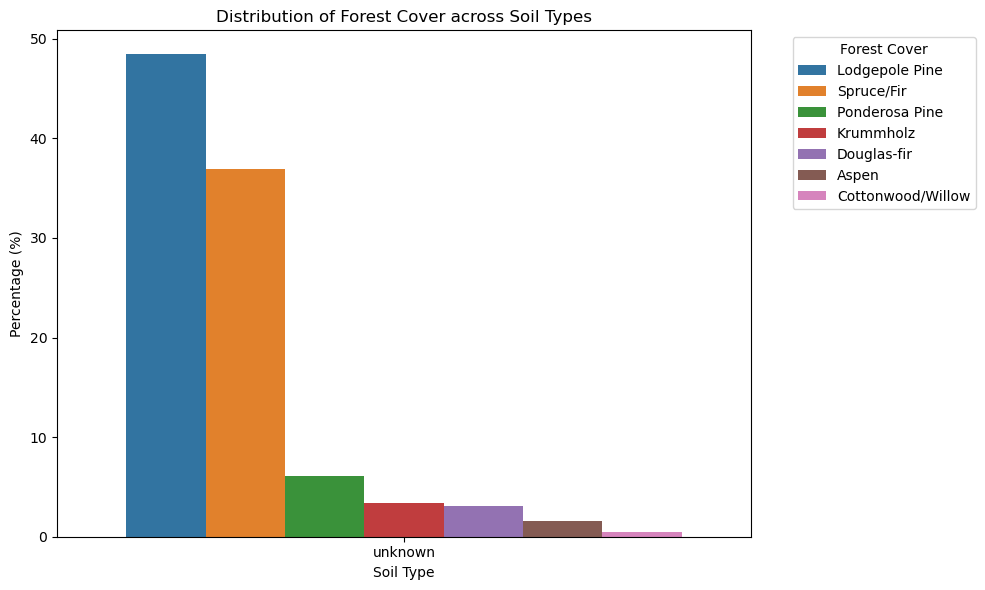

In [72]:
plt.figure(figsize=(10, 6))
soil_counts = df.groupby("Soil_Type")["Forest_Cover"].value_counts(normalize=True).mul(100).rename("Percentage").reset_index()

sns.barplot(data=soil_counts, x="Soil_Type", y="Percentage", hue="Forest_Cover")
plt.title("Distribution of Forest Cover across Soil Types")
plt.xlabel("Soil Type")
plt.ylabel("Percentage (%)")
plt.legend(title="Forest Cover", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## 4.4 Distribution of Forest Cover across Wilderness Areas

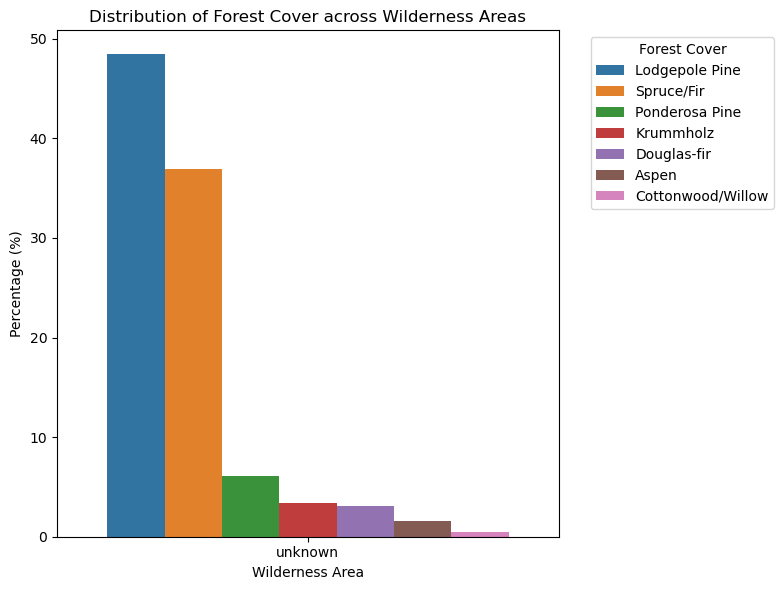

In [73]:
plt.figure(figsize=(8, 6))
wild_counts = df.groupby("Wilderness_Area")["Forest_Cover"].value_counts(normalize=True).mul(100).rename("Percentage").reset_index()

sns.barplot(data=wild_counts, x="Wilderness_Area", y="Percentage", hue="Forest_Cover")
plt.title("Distribution of Forest Cover across Wilderness Areas")
plt.xlabel("Wilderness Area")
plt.ylabel("Percentage (%)")
plt.legend(title="Forest Cover", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()